<a href="https://colab.research.google.com/github/meetdarbar93/AI-ML-Internship/blob/main/Day3/Day3_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load online dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# print information about dataset



In [2]:
# using describe
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Null value detection

In [3]:
#using info
df.info()
print("\nTotal number of null values in each column")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Total number of null values in each column


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Identify columns with missing data.


In [4]:
missing_columns = df.columns[df.isnull().any()]

print("Columns with missing data:")
print(f"There are {len(missing_columns)} have null values")
print(missing_columns)

Columns with missing data:
There are 3 have null values
Index(['Age', 'Cabin', 'Embarked'], dtype='object')


#handling missing values

In [5]:
import math
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(math.floor(df[col].mean())) #set mean for numeric type
    else:
        df[col] = df[col].fillna('Unknown') # set 'Unknown' for other type


# After handling null values

In [6]:
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing data:")
print(f"There are {len(missing_columns)} have null values")
print(missing_columns)

Columns with missing data:
There are 0 have null values
Index([], dtype='object')


In [7]:
print(df['Age'].isnull().sum())
print(df['Cabin'].isnull().sum())
print(df['Embarked'].isnull().sum())
df.head()

0
0
0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


# Removing Duplicates & Fixing Data Types


In [8]:
#count number of duplicate values for all columns
for col in df.columns:
    n = df[col].duplicated().sum()
    print(f"{col} : {n} ")


PassengerId : 0 
Survived : 889 
Pclass : 888 
Name : 0 
Sex : 889 
Age : 803 
SibSp : 884 
Parch : 884 
Ticket : 210 
Fare : 643 
Cabin : 743 
Embarked : 887 


In [9]:
#removing duplicate
print(df.shape)
df = df.drop_duplicates(['Ticket'])
df['Ticket'] = df['Ticket'].astype(str).str.strip().str.upper()
print("Duplicate Tickets after:", df.duplicated(['Ticket']).sum())
print("New shape:", df.shape)

cleaned_path = "/content/titanic_cleaned_latest.csv"
df.to_csv(cleaned_path, index=False)

(891, 12)
Duplicate Tickets after: 0
New shape: (681, 12)


#Convert wrong column types

In [10]:
print(df.dtypes['Age'])


float64


In [11]:
#converting age into int64
df['Age'] = df['Age'].astype('int64')
print(df.dtypes['Age'])

int64


# Rename inconsistent column names (e.g., Age  → age).


In [12]:
df = df.rename(columns = {'Age':'age'})
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Detecting & Handling Outliers

In [13]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1

      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      print(f"{col} : {outliers.shape[0]}")

PassengerId : 0
Survived : 0
Pclass : 0
age : 68
SibSp : 143
Parch : 93
Fare : 62


#Box plot for outliers

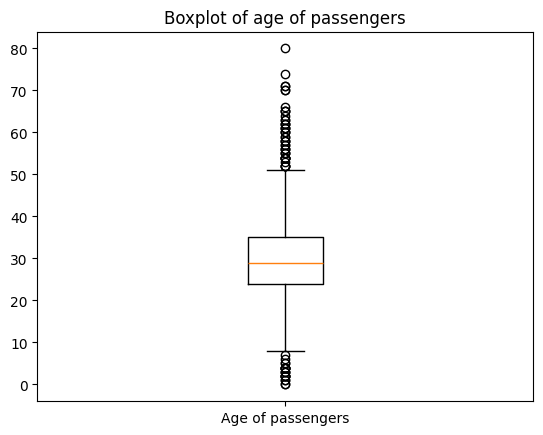

In [14]:
#for age
plt.boxplot(df['age'],tick_labels=["Age of passengers"])
plt.title("Boxplot of age of passengers")
plt.show()

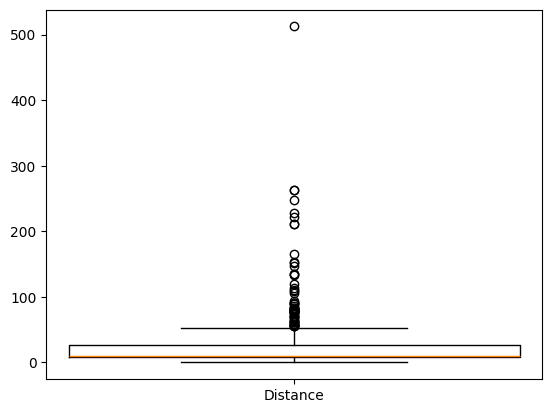

In [15]:
#for Fare(distance)
plt.boxplot(df['Fare'],tick_labels=["Distance"],widths=2)
plt.show()

#export clean csv file

In [16]:
#for download in local storage
from google.colab import files
files.download(cleaned_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>